In [ ]:
import pandas as pd
import tensorflow as tf

In [ ]:
#pip install kaggle
#from google.colab import files
#files.upload()
#
#mkdir -p ~/.kaggle
#cp kaggle.json ~/.kaggle/
#chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d imoore/60k-stack-overflow-questions-with-quality-rate

100% 21.0M/21.0M [00:00<00:00, 46.9MB/s]



In [ ]:
!unzip 60k-stack-overflow-questions-with-quality-rate.zip

Archive:  60k-stack-overflow-questions-with-quality-rate.zip
  inflating: data.csv                


In [ ]:

df=pd.read_csv("data.csv")

In [ ]:
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ


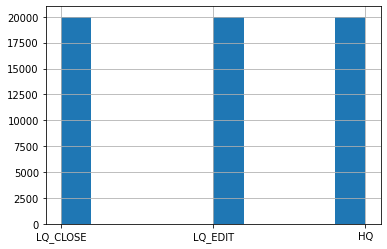

In [ ]:
df['Y'].hist()

In [ ]:

from tensorflow.keras.utils import to_categorical


In [ ]:
import re

In [ ]:
from tqdm import tqdm

In [ ]:
import numpy as np


In [ ]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Dropout,Input

In [ ]:
!pip install transformers

     |████████████████████████████████| 890kB 3.3MB/s 
     |████████████████████████████████| 3.0MB 16.3MB/s 
     |████████████████████████████████| 890kB 32.0MB/s 
     |████████████████████████████████| 1.1MB 25.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=8dac52d16c5d0b5506b16f65b7276259a5dcc9a630bc636e8f2400184f9e59c5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import TFBertModel,BertTokenizer

In [ ]:
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
pre_moodel=TFBertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
tokenizer(text=str(df.iloc[0,1]),text_pair=str(df.iloc[0,2]))

{'input_ids': [101, 9262, 1024, 9377, 4708, 2296, 6721, 3823, 102, 1026, 1052, 1028, 1045, 1005, 1049, 2525, 5220, 2007, 15192, 8518, 2296, 1050, 3823, 2011, 2478, 9262, 1012, 21183, 4014, 1012, 25309, 1998, 9262, 1012, 21183, 4014, 1012, 25309, 10230, 2243, 1012, 2021, 11082, 2360, 1045, 2215, 2000, 6140, 1000, 7592, 2088, 1000, 2000, 1996, 10122, 2296, 6721, 3823, 2013, 1015, 1011, 1019, 1012, 6854, 1045, 1005, 1049, 1999, 1037, 2978, 1997, 1037, 5481, 1998, 2123, 1005, 1056, 2031, 2151, 3642, 2000, 2265, 2061, 2521, 1012, 2151, 2393, 2052, 2022, 19804, 24108, 3064, 1012, 1026, 1013, 1052, 1028, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
df.head()

,Id,Title,Body,Tags,CreationDate,Y
0,34552656,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,<java><repeat>,2016-01-01 00:21:59,LQ_CLOSE
1,34552974,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,<sql><sql-server>,2016-01-01 01:44:52,LQ_EDIT
2,34553034,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,<java><optional>,2016-01-01 02:03:20,HQ
3,34553174,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,<javascript><image><overlay><react-native><opa...,2016-01-01 02:48:24,HQ
4,34553318,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",<swift><operators><whitespace><ternary-operato...,2016-01-01 03:30:17,HQ


In [ ]:
data=df.drop(['Id','CreationDate','Tags'],axis=1)

In [ ]:
data.head()

,Title,Body,Y
0,Java: Repeat Task Every Random Seconds,<p>I'm already familiar with repeating tasks e...,LQ_CLOSE
1,How to get all the child records from differen...,I am having 4 different tables like \r\nselect...,LQ_EDIT
2,Why are Java Optionals immutable?,<p>I'd like to understand why Java 8 Optionals...,HQ
3,Text Overlay Image with Darkened Opacity React...,<p>I am attempting to overlay a title over an ...,HQ
4,Why ternary operator in swift is so picky?,"<p>The question is very simple, but I just cou...",HQ


In [ ]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def preprocess(sample):
  text=re.sub(r'<(p|/p)>',' ',sample)
  text=re.sub(r'\n','',text)
  text=re.sub(r'[^A-Za-z0-9]',' ',text)
  text=re.sub(r" +",' ',text)
  text=text.split()
  text=[w.lower() for w in text if w not in list(range(0,10))]
  text=' '.join(text)
  text=text.split()
  text=[w for w in text if w not in stopwords.words('english')]
  text=' '.join(text)
  yield text
for i in tqdm(range(data.shape[0])):
  data.iloc[i,0]=next(preprocess(str(data.iloc[i,0])))
  data.iloc[i,1]=next(preprocess(str(data.iloc[i,1])))

100%|██████████| 60000/60000 [16:55<00:00, 59.08it/s]


In [ ]:
data['Y']=data['Y'].map({'LQ_CLOSE':-1,'LQ_EDIT':0,'HQ':1})

In [ ]:
data.head()

,Title,Body,Y
0,java repeat task every random seconds,already familiar repeating tasks every n secon...,-1
1,get child records different tables based given...,4 different tables like select system select s...,0
2,java optionals immutable,like understand java 8 optionals designed immu...,1
3,text overlay image darkened opacity react native,attempting overlay title image image darkened ...,1
4,ternary operator swift picky,question simple could find answer pre code ret...,1


In [ ]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)
x=data[['Title','Body']].values
y=data['Y'].values
for train,test in kf.split(x,y):
  x_train,x_test,y_train,y_test=x[train],x[test],y[train],y[test]

In [ ]:
data_train=pd.DataFrame(x_train)
data_train.rename(columns={0:'Title',1:'Body'},inplace=True)
data_y=pd.DataFrame(y_train)
data_y.rename(columns={0:'Y'},inplace=True)
data_training=data_train.join(data_y,on=data_train.index)
data_training.head()

,Title,Body,Y
0,java repeat task every random seconds,already familiar repeating tasks every n secon...,-1
1,get child records different tables based given...,4 different tables like select system select s...,0
2,java optionals immutable,like understand java 8 optionals designed immu...,1
3,text overlay image darkened opacity react native,attempting overlay title image image darkened ...,1
4,ternary operator swift picky,question simple could find answer pre code ret...,1


In [ ]:
data_test=pd.DataFrame(x_test)
data_test.rename(columns={0:'Title',1:'Body'},inplace=True)
data_y=pd.DataFrame(y_test)
data_y.rename(columns={0:'Y'},inplace=True)
data_testing=data_test.join(data_y,on=data_test.index)
data_testing.head()

,Title,Body,Y
0,could somebody explain code snippet please,trying make connect four game got stuck reduce...,0
1,java equivalent c gettype namespace,java equivalent c code gettype namespace code ...,-1
2,sql statement would reorganize results specifi...,select region contact salesman info order regi...,0
3,include delete button fancy box displaying ima...,data fancybox fancybox fancybox defaults butto...,0
4,str split r n split string newline character r...,suppose string code hi nhellon whatsup code wa...,-1


In [ ]:
data_training=data_training.values
data_testing=data_testing.values

In [ ]:
data_training

array([['java repeat task every random seconds',
        'already familiar repeating tasks every n seconds using java util timer java util timertask lets say want print hello world console every random seconds 1 5 unfortunately bit rush code show far help would apriciated',
        -1],
       ['get child records different tables based given parent id sql server',
        '4 different tables like select system select set select item select versions system id n sets foe set qill n items item n versions system br n set br set br n items br item br n versions give systemid retrieve records set items set versions items single storedprocedure',
        0],
       ['java optionals immutable',
        'like understand java 8 optionals designed immutable thread safety',
        1],
       ...,
       ['table view cell section reload tableview ios objective c',
        'try reload method call tableview self tableview reloaddata also try int 0 self allmessagekey count nsindexset sec nsindexset i

In [ ]:
class Datagenerator(tf.keras.utils.Sequence):
  def __init__(self,numpy_data,batch_size,maxlen,shuffle=True):
    self.df=numpy_data
    self.batch=batch_size
    self.maxlen=maxlen
    self.shuffle=shuffle
    self.indexes=np.arange(len(self.df))
    self.index_of_indexes=np.arange(len(self.indexes))
    self.max=self.__len__()
    self.n=0
    self.on_epoch_end()
  def __len__(self):
    return int(np.floor(len(self.indexes)/self.batch))
  def on_epoch_end(self):
    if self.shuffle==True:
      np.random.shuffle(self.index_of_indexes)
  def __next__(self):
    if self.n<=self.max:
      result=self.__getitem__(self.n)
      self.n+=1
      return result
    elif self.n>self.max:
      self.n=0
      result=self.__getitem__(self.n)
      self.n+=1
      return result
  def get_tokens(self,sent1,sent2):
    temp=['[CLS]']+tokenizer.tokenize(sent1)+['[SEP]']+tokenizer.tokenize(sent2)+['[SEP]']
    currlen=len(temp)
    if currlen<=self.maxlen:
      reqlen=self.maxlen-currlen
      return ['[CLS]']+tokenizer.tokenize(sent1)+['[SEP]']+tokenizer.tokenize(sent2)+['[PAD]']*reqlen+['[SEP]']
    else:
      if len(tokenizer.tokenize(sent1))>=254:##512-3=509->sent1==254 and sent2==255
        temp1=tokenizer.tokenize(sent1)[:254]
        temp2=tokenizer.tokenize(sent2)[-255:]
        return ['[CLS]']+temp1+['[SEP]']+temp2+['[SEP]']
      else:##509-len1,temp2-.len==509-len1
        temp1=tokenizer.tokenize(sent1)
        len1=len(temp1)
        reqlen=509-len1
        temp2=tokenizer.tokenize(sent2)[-reqlen:]
        return ['[CLS]']+temp1+['[SEP]']+temp2+['[SEP]']
  def get_ids(self,tokens):
      return tokenizer.convert_tokens_to_ids(tokens)
  def get_mask(self,tokens):
    return np.char.not_equal(tokens,'[PAD]').astype('int')
  def get_segments(self,tokens):
    segments=[]
    currseg=0
    for tok in tokens:
      if tok=='[SEP]':
        segments.append(currseg)
        currseg=1-currseg
      else:
        segments.append(currseg)
    return segments
  def __getitem__(self,index):
    temp_index_indexes=self.index_of_indexes[self.batch*index:(index+1)*self.batch]
    temp_indexes=list(self.indexes[i] for i in temp_index_indexes)
    X1=np.empty((self.batch,self.maxlen),dtype=np.int32)
    X2=np.empty((self.batch,self.maxlen),dtype=np.int32)
    X3=np.empty((self.batch,self.maxlen),dtype=np.int32)
    Y=np.empty((self.batch,3))
    for i in range(len(temp_indexes)):
      tokens=self.get_tokens(str(self.df[temp_indexes[i],0]),str(self.df[temp_indexes[i],1]))
      X1[i,]=self.get_ids(tokens)
      X2[i,]=self.get_segments(tokens)
      X3[i,]=self.get_mask(tokens)
      Y[i,]=to_categorical(int(self.df[temp_indexes[i],-1]),num_classes=3)

    return {'input_ids':X1,'token_type_ids':X2,'attention_mask':X3},Y

In [ ]:

train_generator=Datagenerator(numpy_data=data_training,batch_size=16,maxlen=512,shuffle=True)

In [ ]:
next(train_generator)

({'attention_mask': array([[1, 1, 1, ..., 0, 0, 1],
         [1, 1, 1, ..., 0, 0, 1],
         [1, 1, 1, ..., 0, 0, 1],
         ...,
         [1, 1, 1, ..., 0, 0, 1],
         [1, 1, 1, ..., 0, 0, 1],
         [1, 1, 1, ..., 0, 0, 1]], dtype=int32),
  'input_ids': array([[  101,  2215,  3857, ...,     0,     0,   102],
         [  101, 26632,  3772, ...,     0,     0,   102],
         [  101,  4800, 11689, ...,     0,     0,   102],
         ...,
         [  101,  4297, 28578, ...,     0,     0,   102],
         [  101,  2893,  5270, ...,     0,     0,   102],
         [  101, 23435, 12314, ...,     0,     0,   102]], dtype=int32),
  'token_type_ids': array([[0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 1, 1, 1],
         ...,
         [0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 1, 1, 1]], dtype=int32)},
 array([[1., 0., 0.],
        [0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.],
        [0., 1., 0.

In [ ]:
valid_generator=Datagenerator(numpy_data=data_testing,batch_size=16,maxlen=512,shuffle=False)

In [ ]:

next(valid_generator)

({'attention_mask': array([[1, 1, 1, ..., 0, 0, 1],
         [1, 1, 1, ..., 0, 0, 1],
         [1, 1, 1, ..., 0, 0, 1],
         ...,
         [1, 1, 1, ..., 0, 0, 1],
         [1, 1, 1, ..., 0, 0, 1],
         [1, 1, 1, ..., 0, 0, 1]], dtype=int32),
  'input_ids': array([[  101,  9207,  2358, ...,     0,     0,   102],
         [  101, 10463,  5164, ...,     0,     0,   102],
         [  101,  7919,  2224, ...,     0,     0,   102],
         ...,
         [  101,  4489,  1039, ...,     0,     0,   102],
         [  101, 12826,  3787, ...,     0,     0,   102],
         [  101,  2128, 18886, ...,     0,     0,   102]], dtype=int32),
  'token_type_ids': array([[0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 1, 1, 1],
         ...,
         [0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 1, 1, 1],
         [0, 0, 0, ..., 1, 1, 1]], dtype=int32)},
 array([[0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.],
        [1., 0., 0.],
        [0., 0., 1.

In [ ]:
try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


Running on TPU  ['10.50.194.98:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.50.194.98:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.50.194.98:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
def create_model():
  ins1=Input((512,),dtype=tf.int32,name='input_ids')
  ins2=Input((512,),dtype=tf.int32,name='token_type_ids')
  ins3=Input((512,),dtype=tf.int32,name='attention_mask')
  _,cls=pre_moodel({'input_ids':ins1,'token_type_ids':ins2,'attention_mask':ins3})
  x=Dropout(0.1)(cls)
  x=Dense(500,activation='relu',kernel_initializer='he_normal')(x)
  outs=Dense(3,activation='softmax',name='out')(x)
  model=Model(inputs={'input_ids':ins1,'token_type_ids':ins2,'attention_mask':ins3},outputs={'out':outs})
  return model

In [ ]:
batch1=(data_training.shape[0]//16)*tpu_strategy.num_replicas_in_sync
batch2=(data_testing.shape[0]//16)*tpu_strategy.num_replicas_in_sync

In [ ]:
with tpu_strategy.scope():
  tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
  pre_moodel=TFBertModel.from_pretrained('bert-base-uncased')
  model=create_model()
  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
  model.summary()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
attention_mask (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
input_ids (InputLayer)          [(None, 512)]        0                                            
__________________________________________________________________________________________________
token_type_ids (InputLayer)     [(None, 512)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   ((None, 512, 768), ( 109482240   attention_mask[0][0]             
                                                                 input_ids[0][0]       

In [ ]:
model.fit(train_generator,validation_data=valid_generator,epochs=5,steps_per_epoch=batch1,validation_steps=batch2)

Epoch 1/5
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


UnavailableError: ignored